In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sys.path.insert(0, os.path.abspath('../../..'))
from g4l.estimators import BIC
from g4l.estimators import SMC
import g4l.display
from g4l.estimators import Prune
from g4l.models import ContextTree
from g4l.models import integrity
from g4l.data import Sample

## Comparing the mutual ocurrence of trees between methods

In [16]:
results_folder = os.path.abspath('../../example2/results')
methods = ['SeqROCTM', 'prune', 'smc']
models = ['model1']
sizes = [5000]
correct_model = '000 1 10 100'

def get_results(method, model_name, size):
    file = '%s/%s/%s_%s.csv' % (results_folder, method, model_name, size)
    return pd.read_csv(file)    

def compare(method1, method2):
    df = pd.DataFrame(columns=['sample_idx', 'precision', 'recall'])
    df1 = get_results(method1, model, size)
    df2 = get_results(method2, model, size)
    for sample_idx in df1.sample_idx.unique():
        trees1 = df1[df1.sample_idx == sample_idx]
        trees2 = df2[df2.sample_idx == sample_idx]
        trees2['match'] = trees2.tree.isin(trees1.tree).astype(int)
        trees1['match'] = trees1.tree.isin(trees2.tree).astype(int)
        #trees2[['model_name', 'sample_idx', 'num_contexts', 'match', 'tree']]
        precision = trees2['match'].sum()/len(trees2)
        recall = trees1['match'].sum()/len(trees1)
        df.loc[len(df)] = [int(sample_idx), precision, recall]
    return df

### Model 1

In [23]:
sample_idx = 2
size = 5000
model = 'model1'

df = compare('SeqROCTM', 'smc')
df.head(40)

<ipython-input-16-651d1e533ad1>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trees2['match'] = trees2.tree.isin(trees1.tree).astype(int)
<ipython-input-16-651d1e533ad1>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trees1['match'] = trees1.tree.isin(trees2.tree).astype(int)
<ipython-input-16-651d1e533ad1>:21: RuntimeWarning: invalid value encountered in long_scalars
  precision = trees2['match'].sum()/len(trees2)


,sample_idx,precision,recall
0,0.0,0.750000,0.750000
1,1.0,0.714286,0.714286
2,2.0,0.818182,0.750000
3,3.0,0.625000,0.714286
4,4.0,0.714286,0.714286
5,5.0,1.000000,1.000000
6,6.0,0.750000,0.750000
7,7.0,0.900000,0.900000
8,8.0,0.666667,0.666667
9,9.0,0.900000,0.818182


In [8]:
df.mean()

sample_idx    49.500000
precision      0.427947
recall         0.835098
dtype: float64

In [12]:
x = get_results('prune', 'model1', 10000)
x.head(30)

,model_name,sample_idx,method,tree_idx,tree,num_contexts,likelihood,opt
0,model1,0,prune,0,000000 000001 000010 000100 000101 001000 0010...,21,-3415.285119,0
1,model1,0,prune,1,000000 000001 000010 000100 000101 001000 0010...,20,-3415.285119,0
2,model1,0,prune,2,000000 000001 000010 000100 001000 00101 00101...,19,-3415.285119,0
3,model1,0,prune,3,000000 000001 000010 000100 001000 001010 1000...,18,-3415.285119,0
4,model1,0,prune,4,000000 00001 000010 000100 001000 001010 10000...,17,-3415.285119,0
5,model1,0,prune,5,000000 000010 0001 000100 001000 001010 10000 ...,16,-3415.285119,0
6,model1,0,prune,6,000000 000010 000100 001 001000 001010 10000 1...,15,-3415.285119,0
7,model1,0,prune,7,000000 000010 000100 001000 001010 1 10000 100...,14,-3415.285119,0
8,model1,0,prune,8,00000 000010 000100 001000 001010 1 10000 1000...,13,-3415.289513,0
9,model1,0,prune,9,00000 000010 00100 001000 001010 1 10000 10001...,12,-3415.318881,0


In [10]:
t = x.loc[7].tree
t

'000000 000010 000100 001000 001010 1 10000 100000 100010 10010 100100 10100 101000 101010'

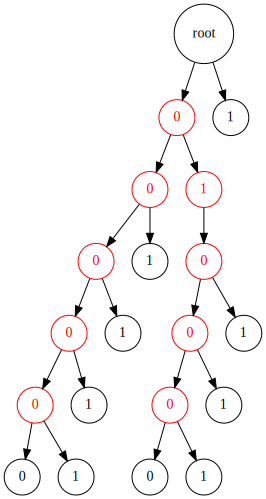

In [14]:
#g4l.display.draw_tree('000 010 0100 1')
g4l.display.draw_tree('000000 000010 1 100  1000 10000 100000 100010 10010 1010', size='40,40')

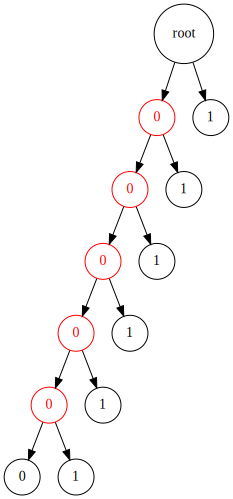

In [25]:
#g4l.display.draw_tree('000 010 0100 1')
g4l.display.draw_tree('000000 1 10 100 1000 10000 100000', size='40,40')

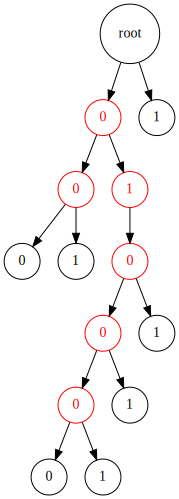

In [24]:
#g4l.display.draw_tree('000 010 0100 1')
g4l.display.draw_tree('000 000010 1 100 100010 10010 1010', size='40,40')